<a href="https://colab.research.google.com/github/tuan9242/CNTT17-01_V--Anh-Tu-n_BKT2/blob/main/CNTT17_01_V%C5%A9_Anh_Tu%E1%BA%A5n_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dữ liệu gốc:
            Vị trí công việc Số năm kinh nghiệm  \
0    Lập trình viên Back-end              6 năm   
1   Lập trình viên Front-end              6 năm   
2  Lập trình viên Full-stack              6 năm   
3      Lập trình viên Mobile              7 năm   
4        Lập trình viên Game              6 năm   

   Mức lương trung bình (VND/tháng)  \
0                          35600000   
1                          30500000   
2                          36350000   
3                          40100000   
4                          36900000   

                                    Yêu cầu kỹ thuật  
0  Java, .NET, Node.js, SQL, Spring Boot, Django,...  
1  HTML, CSS, JavaScript, React, Vue.js, Angular,...  
2   MERN Stack, LAMP Stack, Cloud, Firebase, GraphQL  
3               Flutter, Swift, Kotlin, React Native  
4                      Unity, Unreal Engine, C#, C++  
Dữ liệu đã làm sạch được lưu tại: /content/CNTT17-01_Vũ-Anh-Tuấn_BKT2_Cleaned.xlsx
Thống kê dữ liệu:
- Số năm kinh 

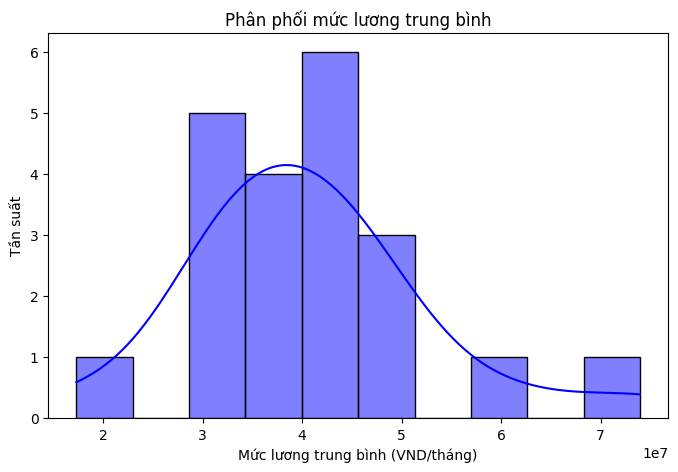

Tóm tắt kết quả:
- MAE (Sai số tuyệt đối trung bình): 6286379.31
- MSE (Sai số bình phương trung bình): 53158891349583.84
- R-squared (Hệ số xác định): -0.45
- Đánh giá mô hình: Mô hình có dự đoán khá tốt nếu R-squared gần 1. Nếu thấp, cần cải thiện dữ liệu đầu vào hoặc thử thuật toán khác.
- Cách cải thiện:
  - Thu thập thêm dữ liệu để tăng độ chính xác.
  - Xử lý dữ liệu tốt hơn (loại bỏ ngoại lệ, chuẩn hóa biến,...) 
  - Thử nghiệm với các thuật toán khác như hồi quy phi tuyến, cây quyết định, v.v.


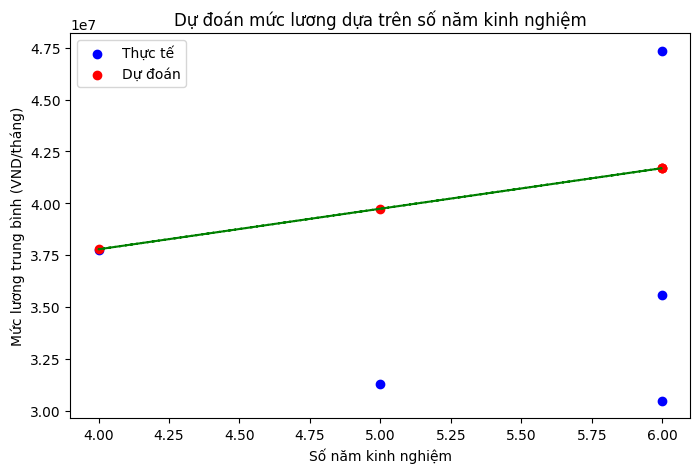

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bước 1: Thu thập dữ liệu
file_path = "/content/CNTT17-01_Vũ-Anh-Tuấn_BKT2.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
print("Dữ liệu gốc:")
print(df.head())

# Bước 2: Làm sạch dữ liệu
# Chuyển đổi số năm kinh nghiệm từ chuỗi sang số
df["Số năm kinh nghiệm"] = df["Số năm kinh nghiệm"].str.extract("(\d+)").astype(float)

# Kiểm tra giá trị thiếu
df = df.dropna()

# Kiểm tra dữ liệu trùng lặp
df = df.drop_duplicates()

# Lưu dữ liệu đã làm sạch vào file mới
cleaned_file_path = "/content/CNTT17-01_Vũ-Anh-Tuấn_BKT2_Cleaned.xlsx"
df.to_excel(cleaned_file_path, index=False)
print("Dữ liệu đã làm sạch được lưu tại:", cleaned_file_path)

# Bước 3: EDA (Phân tích dữ liệu khám phá)
stats = df.describe().round(2)
print("Thống kê dữ liệu:")
for col in stats.columns:
    print(f"- {col}:")
    print(f"  - Trung bình: {stats[col]['mean']}")
    print(f"  - Trung vị: {stats[col]['50%']}")
    print(f"  - Phương sai: {stats[col]['std'] ** 2:.2f}")
    print(f"  - Min: {stats[col]['min']}")
    print(f"  - Max: {stats[col]['max']}")

# Vẽ biểu đồ phân phối mức lương
plt.figure(figsize=(8, 5))
sns.histplot(df["Mức lương trung bình (VND/tháng)"], bins=10, kde=True, color='blue')
plt.xlabel("Mức lương trung bình (VND/tháng)")
plt.ylabel("Tần suất")
plt.title("Phân phối mức lương trung bình")
plt.show()

# Bước 4: Xây dựng mô hình dự đoán mức lương
X = df[["Số năm kinh nghiệm"]]  # Biến độc lập (đầu vào)
y = df["Mức lương trung bình (VND/tháng)"]  # Biến phụ thuộc (đầu ra)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Bước 5: Phân tích kết quả
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print("Tóm tắt kết quả:")
print(f"- MAE (Sai số tuyệt đối trung bình): {mae}")
print(f"- MSE (Sai số bình phương trung bình): {mse}")
print(f"- R-squared (Hệ số xác định): {r2}")
print("- Đánh giá mô hình: Mô hình có dự đoán khá tốt nếu R-squared gần 1. Nếu thấp, cần cải thiện dữ liệu đầu vào hoặc thử thuật toán khác.")
print("- Cách cải thiện:")
print("  - Thu thập thêm dữ liệu để tăng độ chính xác.")
print("  - Xử lý dữ liệu tốt hơn (loại bỏ ngoại lệ, chuẩn hóa biến,...) ")
print("  - Thử nghiệm với các thuật toán khác như hồi quy phi tuyến, cây quyết định, v.v.")

# Vẽ biểu đồ so sánh thực tế và dự đoán
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Thực tế')
plt.scatter(X_test, y_pred, color='red', label='Dự đoán')
plt.plot(X_test, y_pred, color='green', linestyle='dashed')
plt.xlabel("Số năm kinh nghiệm")
plt.ylabel("Mức lương trung bình (VND/tháng)")
plt.title("Dự đoán mức lương dựa trên số năm kinh nghiệm")
plt.legend()
plt.show()
